In [1]:
import os 
dir_primary = 'F:/UrbanDataProject/land_surface_temperature/code/analysis'
# os.chdir('/home/tml/research/land_surface_temperature/code/analysis')
os.chdir(dir_primary)
from analysis import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
code_dir = os.getcwd()
os.chdir('../..')


# Import data

In [2]:
cities = ['bal', 'por', 'det', 'phx']
# import data
grid_size = 500
df = import_data(grid_size)

# Variable importance

In [3]:
calculate_partial_dependence(df, grid_size)

lst_day_mean


f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


lst_night_mean


f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [3]:
# import results
results_pd = pd.read_csv('data/regression/results_partial_dependence_{}.csv'.format(grid_size))

In [6]:
results_pd.head()

,Unnamed: 0,dependent,independent,mean,model,x
0,0,lst_day_mean,alb_mean,-1.545060,gbrt,-1.831724
1,1,lst_day_mean,alb_mean,-2.270836,rf,-1.831724
2,2,lst_day_mean,alb_mean,-2.133061,mars,-1.831724
3,3,lst_day_mean,alb_mean,-3.134960,gam,-1.831724
4,4,lst_day_mean,alb_mean,0.510795,ols,-1.831724


In [4]:
# calculate the swing
calc_swing(results_pd, grid_size)

In [6]:
# import swing results
results_swing = pd.read_csv('data/regression/results_swing_{}.csv'.format(grid_size))

In [7]:
results_swing.head()

,Unnamed: 0,independent,swing,model,dependent
0,0,alb_mean,0.203033,gam,lst_day_mean
1,1,bldg,0.089760,gam,lst_day_mean
2,2,tree_mean,0.707207,gam,lst_day_mean
3,3,alb_mean,0.183007,gbrt,lst_day_mean
4,4,bldg,0.210089,gbrt,lst_day_mean


In [44]:
feature_order = list(results_swing[results_swing.dependent=='lst_night_mean'].groupby('independent').mean().sort_values(by=('swing'),ascending=False).index)

['tree_mean', 'alb_mean', 'bldg']

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


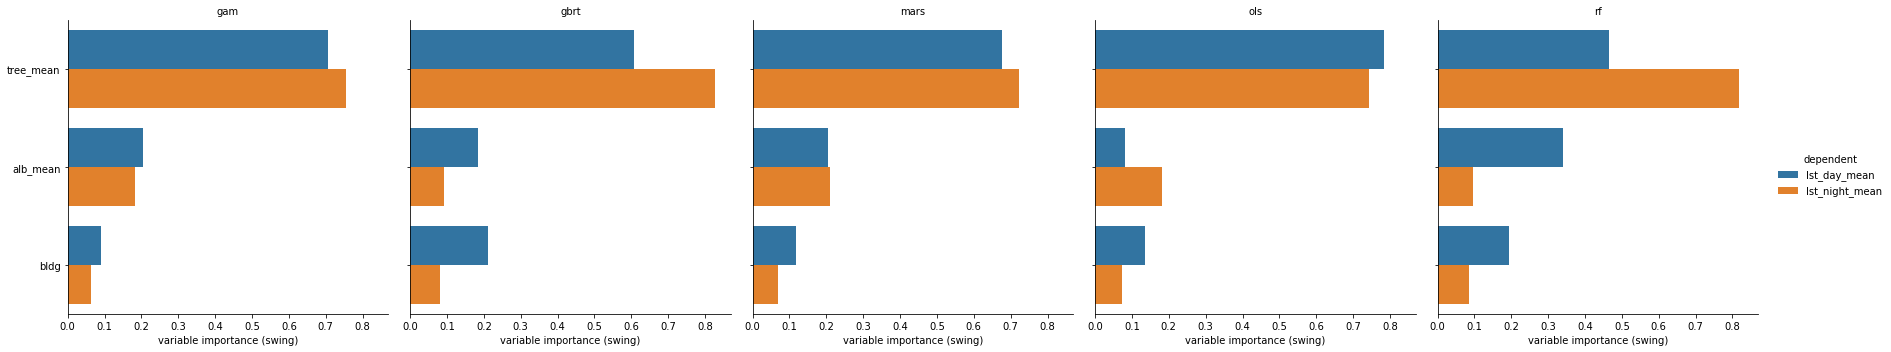

In [47]:
# plot
plot_importance(results_swing, grid_size)